## Fig2. info

In [9]:
# Analysis the entropy of with the gamma
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

%matplotlib inline

# Calculate the entropy of an image
def entropy(img):
    if img.ndim > 2:
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    
    # Get the pdf (histogram)
    p = np.zeros(256)
    for i in range(256):
        p[i] = np.sum(gray[:]==i).astype(float)/(gray.shape[0]*gray.shape[1])
    
    # Compute the entropy
    entropy = 0.0
    for i in range(256):
        if p[i]>0:
            entropy -= p[i]*np.log(p[i])
    return entropy

# our equ.(7), predict the entropy when we applied gamma trans to the PDF
def entropy_gamma(img, gamma):
        
    # Get the pdf (histogram) of the original image
    p = np.zeros(256)
    for i in range(256):
        p[i] = np.sum(img[:]==i).astype(float)/(img.shape[0]*img.shape[1])
    
    # Compute the entropy after distortion with gamma
    entropy = 0.0
    for i in range(256):
        if p[i]>0:
            entropy -= p[i]*np.log(p[i]*((i+0.5)/256)**(1-gamma)/gamma)
    return entropy

# gamma transformation 
def gt(img, gamma):
    n_img  = (img+0.5)/256.0
    g_img = np.power(n_img, gamma)
    out = np.uint8(np.round(g_img*256.0-0.5))
    return out

    
# AGT-ME method, infer a better gamma
def agt(img,gamma0):
    n_img  = (img+0.5)/256.0
    delta_gamma = -1.0/np.mean(np.log(n_img)) 
    return delta_gamma*gamma0

# Calculate the histogram of an image
def hist(img):
    if img.ndim > 2:
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    
    # Get the pdf (histogram)
    h = np.zeros(256)
    for i in range(256):
        h[i] = np.sum(gray[:]==i).astype(float)
    return h

In [10]:
# Read the images
path = "../images/camera/buildings"
index1, index2 = 15,20  # gamma1=0.75, gamma2=0.90
gamma1, gamma2 = 0.05*index1, 0.05*index2
d_gamma = gamma2/gamma1

img1 = cv2.imread(path+"/"+str(index1)+"image.bmp", 0)
img2 = cv2.imread(path+"/"+str(index2)+"image.bmp", 0)
ent1, ent2 = entropy(img1), entropy(img2) 

# Regular Pipeline
img1_g = gt(img1, d_gamma)
ent_reg = entropy(img1_g)

# Novel Pipeline
ent_nov = entropy_gamma(img1, d_gamma)

# show the entropies
print(f"ent1:{ent1:0.3f}\tent2:{ent2:0.3f}\tent_reg:{ent_reg:0.3f}\tent_nov:{ent_nov:0.3f}")

# save the images for manuscript
cv2.imwrite('img1.png', img1); cv2.imwrite('img2.png', img2);cv2.imwrite('img1_g.png', img1_g)

ent1:5.116	ent2:5.035	ent_reg:4.989	ent_nov:5.125


True

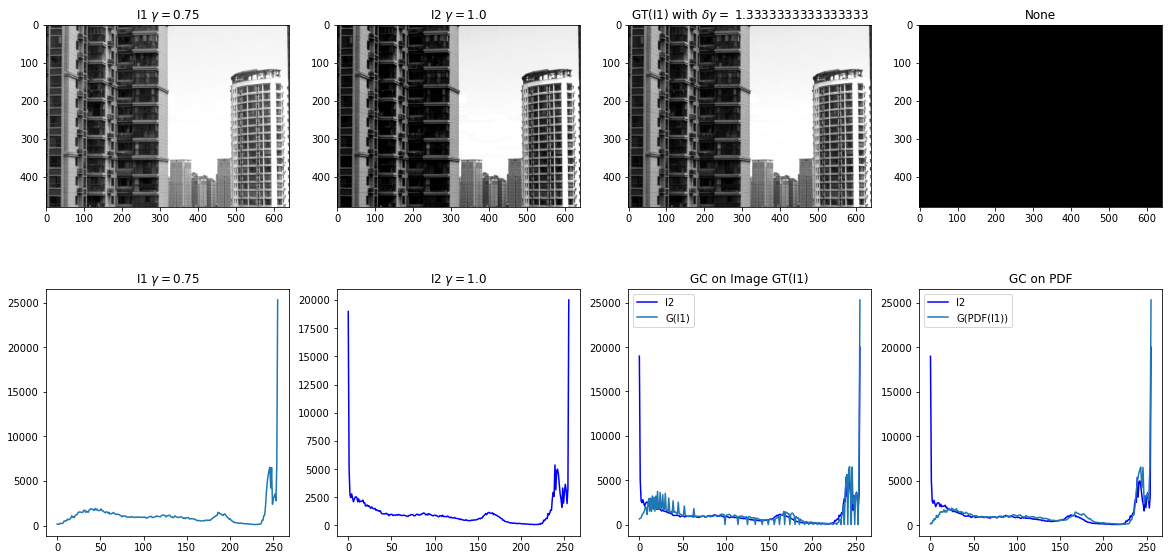

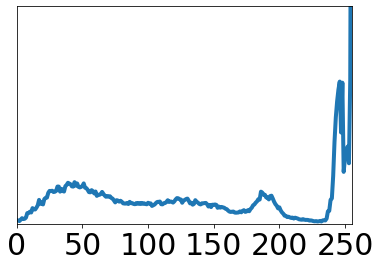

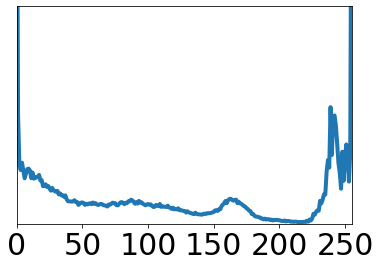

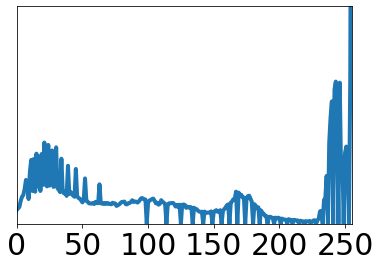

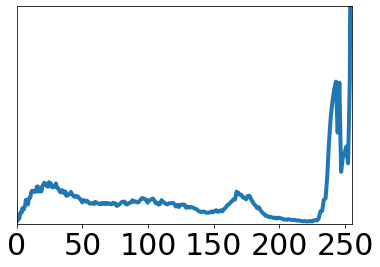

In [11]:
# plot the images and histogram
fig = plt.figure(figsize=(20,10))
plt.subplot(2,4,1); plt.imshow(img1,cmap='gray'); plt.title(f"I1 $\gamma=${gamma1}")
plt.subplot(2,4,2); plt.imshow(img2,cmap='gray'); plt.title(f"I2 $\gamma=${gamma2}")
plt.subplot(2,4,3); plt.imshow(img1_g,cmap='gray'); plt.title(f"GT(I1) with $\delta\gamma=$ {d_gamma}")
plt.subplot(2,4,4); plt.imshow(0*img1_g,cmap='gray'); plt.title(f"None")

x = np.arange(0,256)
x_g = np.power(x/255.0, d_gamma)*255
plt.subplot(2,4,5); plt.plot(x,hist(img1)); plt.title(f"I1 $\gamma=${gamma1}")
plt.subplot(2,4,6); plt.plot(x,hist(img2),'b-'); plt.title(f"I2 $\gamma=${gamma2}")
plt.subplot(2,4,7); plt.plot(x,hist(img2),'b-'); plt.plot(x,hist(img1_g));  plt.title(f"GC on Image GT(I1)")
plt.legend(["I2", "G(I1)"])
plt.subplot(2,4,8); plt.plot(x,hist(img2),'b-'); plt.plot(x_g,hist(img1));  plt.title(f"GC on PDF")
plt.legend(["I2", "G(PDF(I1))"])

# output for manuscript
def plot_hist(x,h, name):
    fig = plt.figure()
    plt.plot(x,h,linewidth=4)
    plt.xlim([0,255])
    plt.ylim([0,10000])
    plt.yticks([])
    plt.xticks(fontsize=30)

    fig.savefig(name)
plot_hist(x,hist(img1),'hist1.png')
plot_hist(x,hist(img2),'hist2.png')
plot_hist(x,hist(img1_g),'hist1_gi.png')
plot_hist(x_g,hist(img1),'hist1_gp.png')

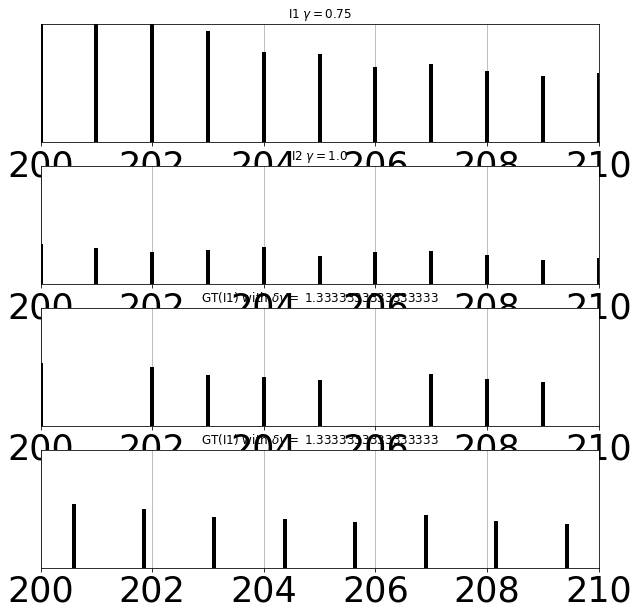

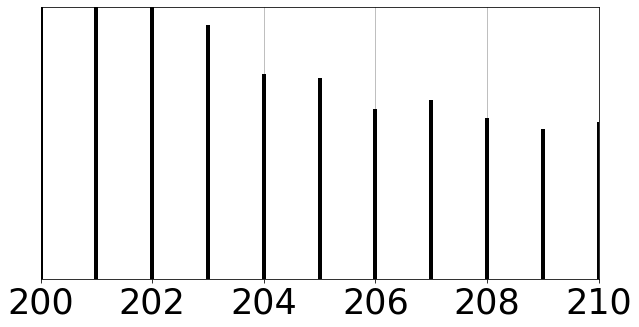

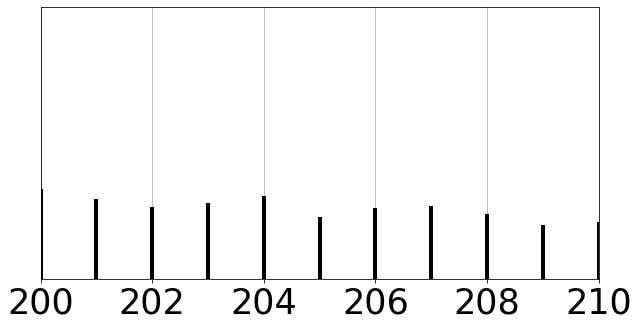

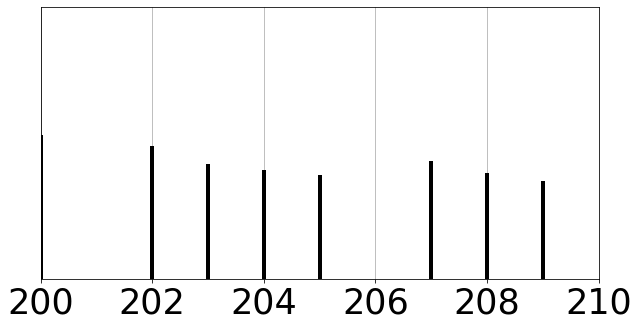

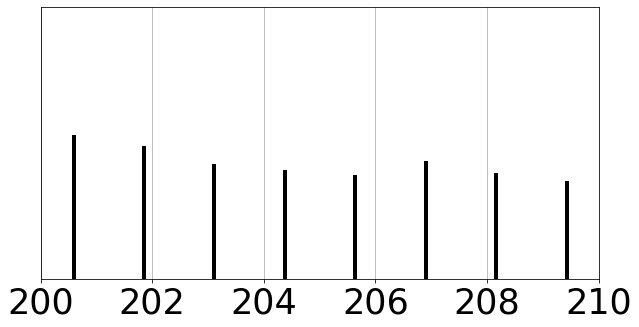

In [13]:
def plot_zoom_hist(x, h, name=None):
    xx = np.reshape(x,(1,-1))+np.array([[0],[0]])
    hh = np.reshape(h,(1,-1))*np.array([[0],[1]])
    
    if name is not None: fig = plt.figure(figsize=(10,5))
    plt.plot(xx,hh,'k', linewidth=4)
    plt.grid('on')
    plt.xlim([200,210])
    plt.ylim([0,5e2])
    plt.yticks([])
    plt.xticks(fontsize=35)
    if name is not None: fig.savefig(name)

plt.figure(figsize=(10,10))
plt.subplot(4,1,1); plot_zoom_hist(x,hist(img1)); plt.title(f"I1 $\gamma=${gamma1}")
plt.subplot(4,1,2); plot_zoom_hist(x,hist(img2)); plt.title(f"I2 $\gamma=${gamma2}")
plt.subplot(4,1,3); plot_zoom_hist(x,hist(img1_g)); plt.title(f"GT(I1) with $\delta\gamma=$ {d_gamma}")
plt.subplot(4,1,4); plot_zoom_hist(x_g,hist(img1)); plt.title(f"GT(I1) with $\delta\gamma=$ {d_gamma}")

plot_zoom_hist(x,hist(img1),'hist1_zoom.png')
plot_zoom_hist(x,hist(img2),'hist2_zoom.png')
plot_zoom_hist(x,hist(img1_g),'hist1_gi_zoom.png')
plot_zoom_hist(x_g,hist(img1),'hist1_gp_zoom.png')
